<a href="https://colab.research.google.com/github/evelinafischer/AH2179/blob/main/Assignment_1_BikeSharingDemand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Assignment 1: Bike Sharing Demand**

####**Load and prepare the data**

In [1]:
#Code from the tutorial

#Import the pandas library for data manipulation
import pandas as pd

#URL of the CSV file containing bus data
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_2_regression_model/Exercise2BikeSharing.csv'

#Read the CSV file from the URL and load it into a pandas DataFrame
df = pd.read_csv(url)

#Display the first 10 rows of the DataFrame to inspect the data
df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [2]:
#Code from the tutorial

#Select only the first 1000 records from the DataFrame
df = df.iloc[:1000]

####**Train/ Test Split**

In [3]:
#Code from the tutorial

#Import function to split data into training and testing sets
from sklearn.model_selection import train_test_split

#Target variable: total number of bike rentals
target = 'cnt'

#Input features: weather and calendar-related variables
features = ['temp','atemp','hum','windspeed','weathersit','hr','weekday','workingday','holiday','season','yr']

X = df[features].copy() #X contains the predictor variables
y = df[target].astype(float) #y contains the target variable, converted to float


#Split the data into training and testing sets
#X_train, y_train → data the model will learn from, 80% of the data
#X_test, y_test → data the model will be evaluated on, 20% of the data
#test_size=0.2 → 20% of the data is reserved for testing
# random_state=42 → ensures the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###**Creating an XGBoost Regression Model**

In [4]:
#Code from https://machinelearningmastery.com/xgboost-for-regression/

#Import the XGBoost library
import xgboost as xgb

#Create an XGBoost regressor model with default parameters
model = xgb.XGBRegressor()

#Train the model using the training data
model.fit(X_train, y_train)

#Make predictions on the test set
y_pred = model.predict(X_test)

####**Evaluate the XGBoost Regression Model**

In [5]:
#Code from the tutorial

#Import evaluation metrics from scikit-learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#Calculate Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)

#Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)

#Calculate R-squared to measure the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)

#Print the evaluation results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 10.82500279173255
Mean Squared Error: 236.84165637898673
R-squared: 0.907114580092476


####**Visualize the results - XGBoost Regression Model**

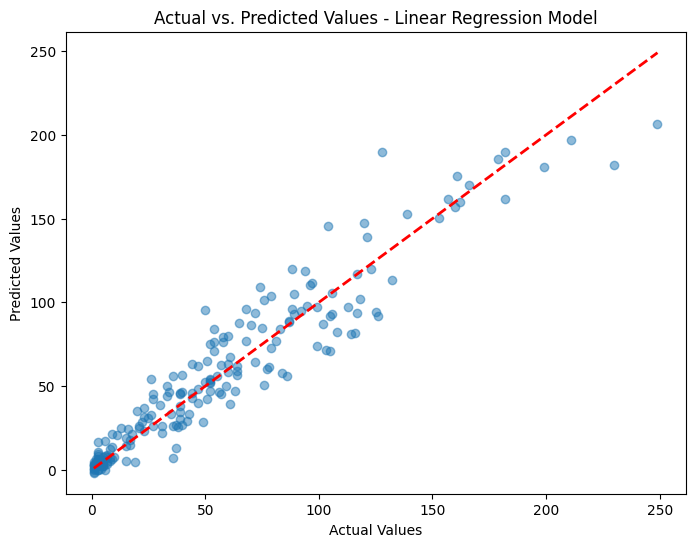

In [6]:
#Code from the tutorial

#Import matplotlib for plotting
import matplotlib.pyplot as plt

#y_test contains the true target values, actual bus delays
#y_pred contains the predicted values from the XGBoost model

#Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  #Each point represents one test sample

#Add labels and a title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Linear Regression Model")

#Add a diagonal line representing perfect predictions
#Points on this line mean the prediction exactly matches the true value
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

#Display the plot
plt.show()

###**AI Model**

####**Normalization**
Scale all inputs to the same range

In [7]:
#Code from the tutorial

#Import StandardScaler from scikit-learn for feature scaling
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler object
#StandardScaler will transform features to have mean = 0 and standard deviation = 1
scaler = StandardScaler()

#Fit the scaler on the training features and transform them
#This ensures all features are on the same scale for the model
X_train_scaled = scaler.fit_transform(X_train)

#Transform the test features using the same scaler
#Important: we do NOT fit on test data to avoid data leakage
X_test_scaled = scaler.transform(X_test)

####**Grid search**
Find the best hyperparamters for the normalized data

In [9]:
#Code from the tutorial

#Import GridSearchCV for hyperparameter tuning and SVR (Support Vector Regression)
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

#Define a parameter grid for tuning the SVM model
#'kernel': type of function used to map the data ('linear' or 'rbf')
#'C': regularization parameter controlling the trade-off between fitting the training data and keeping the model simple
#'epsilon': margin of tolerance in regression (how much error is ignored)
param_grid = {
    'kernel': ['linear',  'rbf'],
    'C': [ 1, 10],
    'epsilon': [ 1, 10]
}

#Create a GridSearchCV object
#SVR() → the SVM regression model to tune
#param_grid → all combinations of hyperparameters to test
#cv=5 → use 5-fold cross-validation on the training data to evaluate each combination
#verbose=2 → print progress so one can see what the grid search is doing
grid_search = GridSearchCV(SVR(), param_grid, cv=5, verbose=2)

#Fit the grid search to the normalized training data
#This trains many SVM models with all hyperparameter combinations and evaluates them using cross-validation
grid_search.fit(X_train_scaled, y_train)

#Get the best combination of hyperparameters found by grid search
best_params = grid_search.best_params_

#Print the best hyperparameters and the corresponding cross-validation score
print("Best Parameters:", best_params)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, epsilon=1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, epsilon=1, kernel=rbf; total time=   0.0s
[CV] END .....................C=1, epsilon=10, kernel=linear; total time=   0.0s
[CV] END .....................C=1, epsilon=10, ke

####**Train the SVM Regression Model**

In [10]:
#Code from the tutorial

#Create an SVR (Support Vector Regression) model using the best parameters from the grid search
#'kernel', 'C', and 'epsilon' are set to the values found as optimal during grid search
best_svr = SVR(kernel=best_params['kernel'], C=best_params['C'], epsilon=best_params['epsilon'])

#Train the SVM model on the training data
best_svr.fit(X_train_scaled, y_train)

SVR(C=10, epsilon=10)

####**Evaluation - SVM Regression Model**

In [11]:
#Code fromt the tutorial

#Import metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#Use the trained SVM model to predict target values for the test set
y_pred = best_svr.predict(X_test_scaled)

#Calculate Mean Absolute Error on the test set
mae = mean_absolute_error(y_test, y_pred)

#Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)

#Calculate R-squared to measure the proportion of variance explained by the model
r2 = r2_score(y_test, y_pred)

#Print the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 26.127215663064916
Mean Squared Error: 1626.3386921595675
R-squared: 0.36217659240075484


####**Visualize the results - SVM Regression Model**

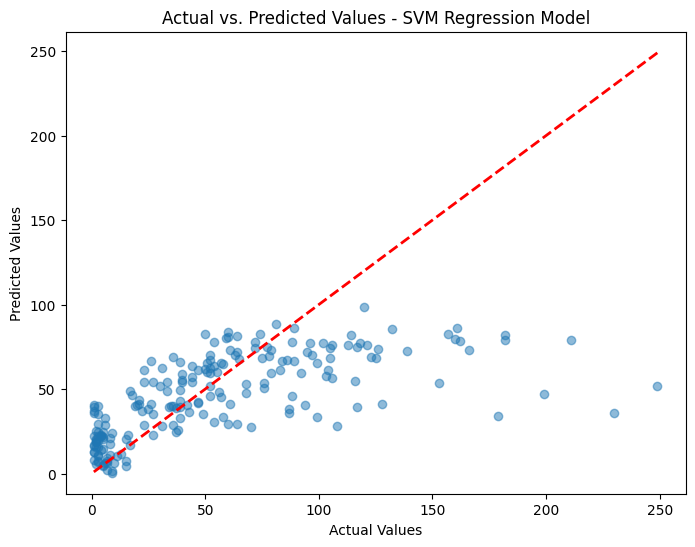

In [12]:
#Code from the tutorial

#Import matplotlib for plotting
%matplotlib inline
import matplotlib.pyplot as plt

#y_test contains the actual target values for the test dataset
#y_pred contains the predicted values from the trained SVM model

#Create a scatter plot to visualize the relationship between actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5) #Each point represents actual vs. predicted


#Add labels and a title for clarity
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - SVM Regression Model")

#Add a diagonal line representing perfect predictions, y_pred = y_test
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

#Display the plot
plt.show()

##**Sources**
https://machinelearningmastery.com/xgboost-for-regression/ (Accessed: 2025-08-27)